1. How to get the common items between two arrays?

In [ ]:
import numpy as np

In [ ]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([4,7,15,3,5,6,9,1,12,14])
common_items = np.intersect1d(a, b)
common_items

array([1, 3, 4, 5, 6])

2. How to remove from array ‘a’ the items that exist in ‘b’?

In [ ]:
a = np.array([1,2,3,5,6,6,7,8,9,10])
b = np.array([2,4,6,8,10])
result = np.setdiff1d(a, b)
result

array([1, 3, 5, 7, 9])

3. Replace all the even numbers in array ‘a’ with the new value ‘-2’:

In [ ]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
a[a % 2 == 0] = -2
a


array([-2,  1, -2,  3, -2,  5, -2,  7, -2,  9])

4. Swap the last two rows of the following array:

In [ ]:
a = np.arange(25).reshape(5,5)

In [ ]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
a[[3, 4]] = a[[4, 3]]
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19]])

5. Draw a scatter plot with the following data: s_x and s_y:
  1. Overlap in this plot the additional dataset s_z, and add a proper legend to the plot, axes labels and a
  title
  2. Generate 2 subplots in a figure using datasets s_y and s_z, and add a proper legend to the plots and a
  title

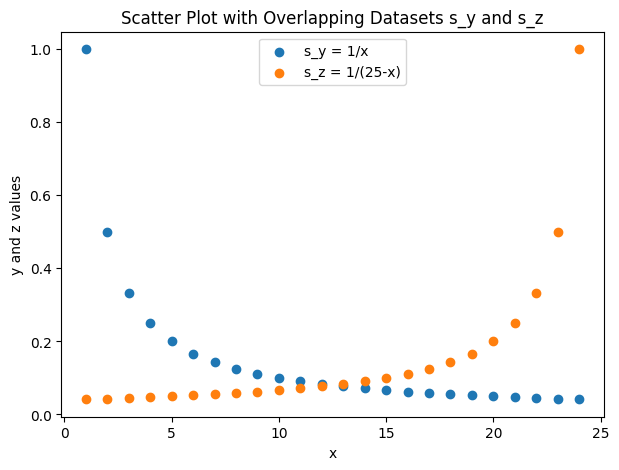

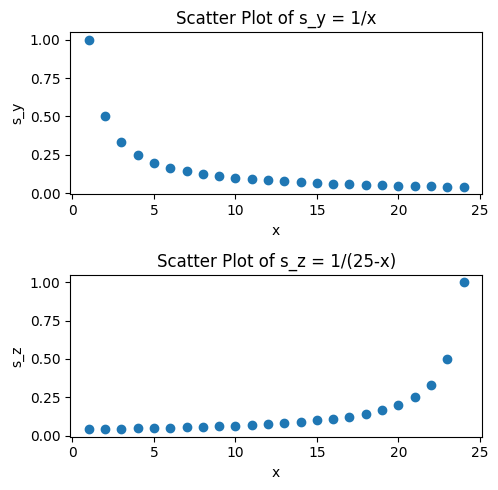

In [ ]:
import matplotlib.pyplot as plt

# Data
s_x = range(1, 25)
s_y = [1 / x for x in s_x]
s_z = [1 / (25 - x) for x in s_x]

plt.figure(figsize=(7, 5))
plt.scatter(s_x, s_y, label='s_y = 1/x')
plt.scatter(s_x, s_z, label='s_z = 1/(25-x)')
plt.title('Scatter Plot with Overlapping Datasets s_y and s_z')
plt.xlabel('x')
plt.ylabel('y and z values')
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(5, 5))

axs[0].scatter(s_x, s_y)
axs[0].set_title('Scatter Plot of s_y = 1/x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('s_y')

axs[1].scatter(s_x, s_z)
axs[1].set_title('Scatter Plot of s_z = 1/(25-x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('s_z')

plt.tight_layout()
plt.show()


6. Prepare the plot “Root Mean Square Fluctuation vs Residue Number” (Potasium Ion Channel Kv1.2) by using the following input file 'rmsf.xvg'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path to the 'rmsf.xvg' file
file_path = './rmsf.xvg'

#1. read the input file and:
#- skip the lines that start with # or @
#- rename columns as Residue_Number and RMSF passing the name of columns from an external list

with open(file_path, 'r') as file:
    lines_to_skip = 0
    for line in file:
        if line.startswith(('#', '@')):
            lines_to_skip += 1
        else:
            break

columns = ['Residue_Number', 'RMSF']
df = pd.read_csv(file_path, skiprows=lines_to_skip, header=None, delim_whitespace=True)
df.columns = columns


In [ ]:
# 2. inspect the created dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Residue_Number  2848 non-null   int64  
 1   RMSF            2848 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.6 KB


In [ ]:
df

,Residue_Number,RMSF
0,1,0.3253
1,2,0.2577
2,3,0.2330
3,4,0.1791
4,5,0.1793
...,...,...
2843,2844,0.1707
2844,2845,0.1805
2845,2846,0.1921
2846,2847,0.1935


In [ ]:
# 3. show a snapshot of dafaframe showing a set of rows randomly selected
df.sample(5)

,Residue_Number,RMSF
2356,2357,0.3295
2020,2021,0.1807
414,415,0.1809
718,719,0.1083
301,302,0.3365


In [ ]:
# 4. get basic statistics about the loaded data
df.describe()

,Residue_Number,RMSF
count,2848.000000,2848.000000
mean,1424.500000,0.205974
std,822.291108,0.078368
min,1.000000,0.085200
25%,712.750000,0.147175
50%,1424.500000,0.187800
75%,2136.250000,0.246525
max,2848.000000,0.654500


In [ ]:
# 5. get the datetype for each elements in colums
df.dtypes

Residue_Number      int64
RMSF              float64
dtype: object

In [ ]:
# 6. add a new colum with the (RMDF) 2 and save a new dataframe
df['RMSF_Squared'] = df['RMSF'] ** 2
df

,Residue_Number,RMSF,RMSF_Squared
0,1,0.3253,0.105820
1,2,0.2577,0.066409
2,3,0.2330,0.054289
3,4,0.1791,0.032077
4,5,0.1793,0.032148
...,...,...,...
2843,2844,0.1707,0.029138
2844,2845,0.1805,0.032580
2845,2846,0.1921,0.036902
2846,2847,0.1935,0.037442


In [ ]:
new_df_path = './modified_rmsf.csv'
df.to_csv(new_df_path, index=False)

Plot saved to: ./rmsf_plot.jpg


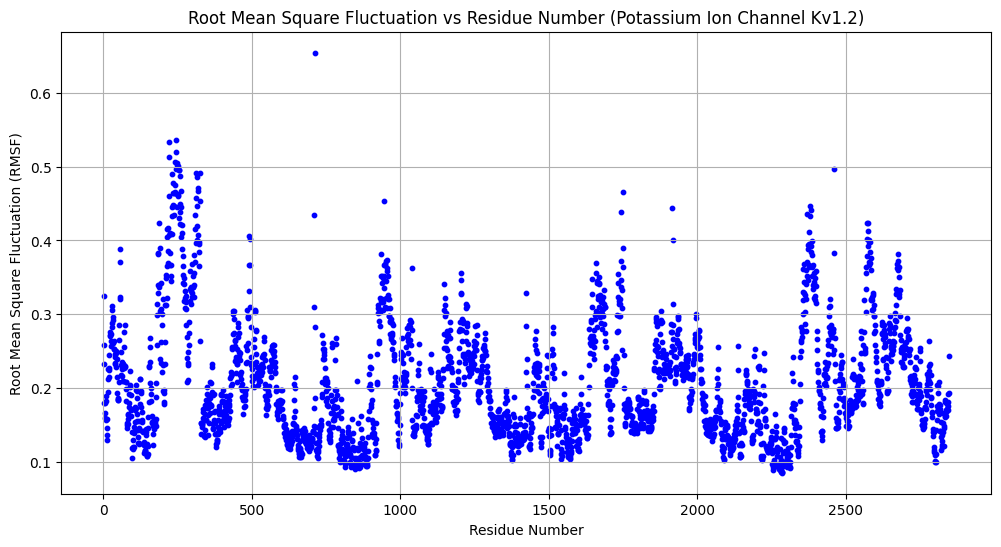

In [ ]:
# 7. make the plot of residue_name vs RMSF and save a jpeg pic
plt.figure(figsize=(12, 6))
plt.scatter(df['Residue_Number'], df['RMSF'], color='blue', s=10)
plt.title('Root Mean Square Fluctuation vs Residue Number (Potassium Ion Channel Kv1.2)')
plt.xlabel('Residue Number')
plt.ylabel('Root Mean Square Fluctuation (RMSF)')
plt.grid(True)

plot_path = './rmsf_plot.jpg'
plt.savefig(plot_path, format='jpg', dpi=300)

print("Plot saved to:", plot_path)